In [1]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy import stats

from useful_functions import *

## Import Data

In [2]:
tables_to_join = ["tPlantMicrobeGenera", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(277695, 15)

In [3]:
full_df.head()

sample_id                                             genera  \
0      RRL1  Archaea|Euryarchaeota|Halobacteria|Halobacteri...   
1      RRL2  Archaea|Euryarchaeota|Halobacteria|Halobacteri...   
2      RRL3  Archaea|Euryarchaeota|Halobacteria|Halobacteri...   
3      RRL4  Archaea|Euryarchaeota|Halobacteria|Halobacteri...   
4      RRL5  Archaea|Euryarchaeota|Halobacteria|Halobacteri...   

   relative_abundance sample_id site_id collect_date sample_id        V1  \
0             0.00000      RRL1     RRL    6/25/2021      RRL1  0.753244   
1             0.01333      RRL2     RRL    6/25/2021      RRL2  0.708412   
2             0.00000      RRL3     RRL    6/25/2021      RRL3  0.778046   
3             0.00943      RRL4     RRL    6/25/2021      RRL4  0.720367   
4             0.00581      RRL5     RRL    6/25/2021      RRL5  0.572487   

         V2   species       PC1       PC2       PC3       PC4       PC5  
0  0.246756  exaltata  0.194769  0.048276 -0.023880 -0.017138 -0.039842  
1  0.291588  exaltata  0.154924  0.071277  0.000923 -0.025830  0.005592  
2  0.221954  exaltata  0.187750  0.035009 -0.016006 -0.012529 -0.011169  
3  0.279633  exaltata  0.167167  0.046053 -0.032754 -0.016192 -0.028988  
4  0.427513  exaltata  0.099801  0.089800  0.000613 -0.004979  0.017524

## Clean Data

In [4]:
#drop duplicate columns
df = full_df
df = df.T.drop_duplicates().T
df.shape

(277695, 13)

In [5]:
subdf = df

In [41]:
origin_pivoted_df = subdf.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='genera', values='relative_abundance')
origin_pivoted_df.shape

KeyError: 'genera'

In [ ]:
origin_pivoted_df.head()

In [ ]:
row_sum = origin_pivoted_df.sum(axis=1)

In [ ]:
origin_pivoted_df = origin_pivoted_df.reset_index()

### Create Dataset with Values summing to 1 for each row

In [ ]:
genera_col = origin_pivoted_df.columns
genera_col = genera_col.drop(['sample_id','site_id', 'species', 'V2'])

In [ ]:
sub_pivot = origin_pivoted_df[genera_col].astype(float)

In [ ]:
for row in range(sub_pivot.shape[0]):
    sub_pivot.loc[row] = sub_pivot.loc[row]/row_sum[row]

In [ ]:
new_sum = sub_pivot.sum(axis=1)
new_sum

In [ ]:
origin_pivoted_df[genera_col] = sub_pivot

In [ ]:
origin_pivoted_df.head()

In [ ]:
row_sum = origin_pivoted_df[genera_col].sum(axis=1)
print(row_sum)

### Without further modification PCA by Site

In [42]:
pivoted_df = origin_pivoted_df

In [43]:
X = pivoted_df[genera_col]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['site_id'])
fig.update_layout(
    title = "Plant Microbes by Site without Reduction",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### Without further modification PCA by Species

In [44]:
X = pivoted_df[genera_col]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['species'])
fig.update_layout(
    title = "Plant Microbes by Species without Reduction",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### Get Top 100 Genera

In [45]:
pivoted_df.head()

genera sample_id site_id  species        V2  \
0          CMB10     CMB  syriaca  0.999777   
1          CMB11     CMB  syriaca  1.000000   
2          CMB13     CMB  syriaca  0.989131   
3          CMB14     CMB  syriaca  0.999992   
4          CMB15     CMB  syriaca  0.998548   

genera  Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum  \
0                                                0.000000                              
1                                                0.000000                              
2                                                0.000000                              
3                                                0.000000                              
4                                                0.000963                              

genera  Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halococcaceae|Halococcus  \
0                                                0.002321                             
1                                                0.002065                             
2                                                0.003318                             
3                                                0.004577                             
4                                                0.002829                             

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Natrinema  \
0                                                     0.0                         
1                                                     0.0                         
2                                                     0.0                         
3                                                     0.0                         
4                                                     0.0                         

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Natronococcus  \
0                                                     0.0                             
1                                                     0.0                             
2                                                     0.0                             
3                                                     0.0                             
4                                                     0.0                             

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Saliphagus  \
0                                                0.000078                          
1                                                0.000077                          
2                                                0.000148                          
3                                                0.000119                          
4                                                0.000000                          

genera  Archaea|Euryarchaeota|Methanobacteria|Methanobacteriales|Methanobacteriaceae|Methanobacterium  \
0                                                     0.0                                               
1                                                     0.0                                               
2                                                     0.0                                               
3                                                     0.0                                               
4                                                     0.0                                               

genera  ...  Viruses|||Caudovirales|Siphoviridae|Np1virus  \
0       ...                                           0.0   
1       ...                                           0.0   
2       ...                                           0.0   
3       ...                                           0.0   
4       ...                                           0.0   

genera  Viruses|||Caudovirales|Siphoviridae|Pa6virus  \
0                                                0.0   
1                           

In [46]:
sum_row = pivoted_df[genera_col].sum()

In [47]:
top_100 = sum_row.nlargest(100)

In [48]:
select_columns = (top_100.index).tolist()

In [49]:
select_columns.insert(0, 'V2')
select_columns.insert(0, 'sample_id')
select_columns.insert(0, 'site_id')
select_columns.insert(0, 'species')

In [50]:
pivoted_df = pivoted_df[select_columns]

In [51]:
pivoted_df.head()

genera  species site_id sample_id        V2  \
0       syriaca     CMB     CMB10  0.999777   
1       syriaca     CMB     CMB11  1.000000   
2       syriaca     CMB     CMB13  0.989131   
3       syriaca     CMB     CMB14  0.999992   
4       syriaca     CMB     CMB15  0.998548   

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                0.251082                        
1                                                0.229215                        
2                                                0.248940                        
3                                                0.207900                        
4                                                0.115334                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.109277                              
1                                                0.108392                              
2                                                0.130199                              
3                                                0.115806                              
4                                                0.067272                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                                0.040132                       
1                                                0.047850                       
2                                                0.066974                       
3                                                0.037190                       
4                                                0.002857                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.037915                              
1                                                0.043322                              
2                                                0.037310                              
3                                                0.045575                              
4                                                0.033787                              

genera  Eukaryota||Chlorarachniophyceae|||Lotharella  \
0                                           0.032095   
1                                           0.032733   
2                                           0.042894   
3                                           0.039696   
4                                           0.023724   

genera  Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas  \
0                                                0.022154                                          
1                                                0.033949                                          
2                                                0.035666                                          
3                                                0.022566                                          
4                                                0.208106                                          

genera  ...  \
0       ...   
1       ...   
2       ...   
3       ...   
4       ...   

genera  Eukaryota|Apicomplexa|Conoidasida|Eucoccidiorida|Cryptosporidiidae|Cryptosporidium  \
0                                                0.000027                                    
1                                                0.000089                                    
2                                                0.001993                                    
3                                                0.001717                                    
4                                                0.000106                                    

genera  Bacteria|Cyanobacteria||Chroococcales|Aphanothecaceae|Halothece  \
0         

In [52]:
pivoted_df[top_100.index] = StandardScaler().fit_transform(pivoted_df[top_100.index])  

C:\Users\15404\AppData\Local\Temp\ipykernel_22436\759430129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
pivoted_df.head()

genera  species site_id sample_id        V2  \
0       syriaca     CMB     CMB10  0.999777   
1       syriaca     CMB     CMB11  1.000000   
2       syriaca     CMB     CMB13  0.989131   
3       syriaca     CMB     CMB14  0.999992   
4       syriaca     CMB     CMB15  0.998548   

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                1.658585                        
1                                                1.177418                        
2                                                1.611450                        
3                                                0.708383                        
4                                               -1.328517                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.449190                              
1                                                0.398179                              
2                                                1.654841                              
3                                                0.825395                              
4                                               -1.971450                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                               -0.625305                       
1                                               -0.265843                       
2                                                0.624824                       
3                                               -0.762340                       
4                                               -2.361323                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.059558                              
1                                                0.624099                              
2                                               -0.003629                              
3                                                0.859331                              
4                                               -0.371434                              

genera  Eukaryota||Chlorarachniophyceae|||Lotharella  \
0                                          -0.639892   
1                                          -0.554101   
2                                           0.812189   
3                                           0.382159   
4                                          -1.765472   

genera  Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas  \
0                                               -0.180795                                          
1                                                0.179081                                          
2                                                0.231470                                          
3                                               -0.168207                                          
4                                                5.492609                                          

genera  ...  \
0       ...   
1       ...   
2       ...   
3       ...   
4       ...   

genera  Eukaryota|Apicomplexa|Conoidasida|Eucoccidiorida|Cryptosporidiidae|Cryptosporidium  \
0                                               -0.850650                                    
1                                               -0.800855                                    
2                                                0.729160                                    
3                                                0.507545                                    
4                                               -0.787252                                    

genera  Bacteria|Cyanobacteria||Chroococcales|Aphanothecaceae|Halothece  \
0         

### PCA By Site with Top 100 Most Relatively Abundant Genera

In [56]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['site_id'])
fig.update_layout(
    title = "100 Most Abundant Leaf Microbe Genera by Site PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

In [57]:
X = pivoted_df[top_100.index]

perplexity_value = 5 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=pivoted_df['site_id'])
fig.update_layout(title = 'Plant Microbes by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

In [58]:
X = pivoted_df[top_100.index]

perplexity_value = 3 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=pivoted_df['site_id'])
fig.update_layout(title = 'Plant Microbes by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

### PCA and TSNE Using Geographic Locations: Cole Mountain, Blacksburg, Wintergreen

In [59]:
subdf = pivoted_df
subdf['site_id'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1}, inplace=True)
subdf = subdf[subdf["site_id"].isin([0,1,2])]

C:\Users\15404\AppData\Local\Temp\ipykernel_22436\750663343.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
X = subdf[top_100.index]

newnames = {'0':'Wintergreen', '1': 'Cole Mountain', '2': 'Blacksburg'}


pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=subdf['site_id'])
fig.update_layout(
    title = "100 Most Abundant Leaf Microbe Genera by Geographic Location PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show()

In [61]:
X = subdf[top_100.index]

perplexity_value = 5 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=subdf['site_id'])
fig.update_layout(title = 'Plant Microbes by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

### PCA By Species with Top 100 Most Relatively Abundant Genera

In [62]:
pivoted_df

genera   species site_id sample_id        V2  \
0        syriaca       1     CMB10  0.999777   
1        syriaca       1     CMB11  1.000000   
2        syriaca       1     CMB13  0.989131   
3        syriaca       1     CMB14  0.999992   
4        syriaca       1     CMB15  0.998548   
..           ...     ...       ...       ...   
160     exaltata       1      SLG3  0.448157   
161     exaltata       1      SLG4  0.412527   
162     exaltata       1      SLG5  0.307915   
163     exaltata       1      SLG6  0.482944   
164      syriaca       1      SLG8  0.999504   

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                1.658585                        
1                                                1.177418                        
2                                                1.611450                        
3                                                0.708383                        
4                                               -1.328517                        
..                                                    ...                        
160                                             -1.418869                        
161                                             -0.379646                        
162                                              0.320774                        
163                                             -0.502977                        
164                                             -1.082782                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.449190                              
1                                                0.398179                              
2                                                1.654841                              
3                                                0.825395                              
4                                               -1.971450                              
..                                                    ...                              
160                                             -0.189635                              
161                                             -0.113333                              
162                                              0.388606                              
163                                              1.097577                              
164                                              0.702963                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                               -0.625305                       
1                                               -0.265843                       
2                                                0.624824                       
3                                               -0.762340                       
4                                               -2.361323                       
..                                                    ...                       
160                                             -0.533663                       
161                                             -0.296765                       
162                                             -0.180938                       
163                                              0.754959                       
164                                              0.462102                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.059558                              
1                                                0.624099                              
2                                               -0.003629                              
3                                                0.85933

In [36]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['species'])
fig.update_layout(
    title = "Top 100 Plant Microbes by Species",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### PCA Using only Syriaca and Exaltata

In [64]:
pivoted_df = pivoted_df[pivoted_df["species"].isin(['syriaca', 'exaltata'])]

In [65]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['species'])
fig.update_layout(
    title = "100 Most Abundant Leaf Microbe Genera by Plant Host Species PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

In [101]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

combined =  pd.DataFrame(pivoted_df['species'])
combined.head()
#combined['x0'] = components
#combined['x1'] = components[1]
x0_list = []
x1_list = []
for i in components:
    x0_list.append(i[0])
    x1_list.append(i[1])
combined['x0'] = x0_list
combined['x1'] = x1_list
combined.head()

species        x0        x1
0  syriaca -4.517760  3.587231
1  syriaca -3.042038  2.792908
2  syriaca -1.576132 -0.528997
3  syriaca -0.459053  0.846058
4  syriaca -4.082390  7.807171

In [104]:
combined[combined['species'] == 'syriaca']['x0'].min()

-6.887645404965173

In [110]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)
#print(components)
fig = px.scatter(components, x=0, y=1, color=pivoted_df['species'])

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=combined[combined['species'] == 'syriaca']['x0'].min(), y0=combined[combined['species'] == 'syriaca']['x1'].min(),
    x1=combined[combined['species'] == 'syriaca']['x0'].max(), y1=combined[combined['species'] == 'syriaca']['x1'].max(),
    opacity=0.2,
    fillcolor="blue",
    line_color="blue",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=combined[combined['species'] == 'exaltata']['x0'].min(), y0=combined[combined['species'] == 'exaltata']['x1'].min(),
    x1=combined[combined['species'] == 'exaltata']['x0'].max(), y1=combined[combined['species'] == 'exaltata']['x1'].max(),
    opacity=0.2,
    fillcolor="red",
    line_color="red",
)
fig.update_layout(
    title = "100 Most Abundant Leaf Microbe Genera by Plant Host Species PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')


fig.show()

In [39]:
X = pivoted_df[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pivoted_df['V2'])
fig.update_layout(
    title = "Plant Microbes by Site Colored by % Syriaca",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

In [40]:
pivoted_df.head()

genera  species site_id sample_id        V2  \
0       syriaca       1     CMB10  0.999777   
1       syriaca       1     CMB11  1.000000   
2       syriaca       1     CMB13  0.989131   
3       syriaca       1     CMB14  0.999992   
4       syriaca       1     CMB15  0.998548   

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                1.658585                        
1                                                1.177418                        
2                                                1.611450                        
3                                                0.708383                        
4                                               -1.328517                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.449190                              
1                                                0.398179                              
2                                                1.654841                              
3                                                0.825395                              
4                                               -1.971450                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                               -0.625305                       
1                                               -0.265843                       
2                                                0.624824                       
3                                               -0.762340                       
4                                               -2.361323                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.059558                              
1                                                0.624099                              
2                                               -0.003629                              
3                                                0.859331                              
4                                               -0.371434                              

genera  Eukaryota||Chlorarachniophyceae|||Lotharella  \
0                                          -0.639892   
1                                          -0.554101   
2                                           0.812189   
3                                           0.382159   
4                                          -1.765472   

genera  Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas  \
0                                               -0.180795                                          
1                                                0.179081                                          
2                                                0.231470                                          
3                                               -0.168207                                          
4                                                5.492609                                          

genera  ...  \
0       ...   
1       ...   
2       ...   
3       ...   
4       ...   

genera  Eukaryota|Apicomplexa|Conoidasida|Eucoccidiorida|Cryptosporidiidae|Cryptosporidium  \
0                                               -0.850650                                    
1                                               -0.800855                                    
2                                                0.729160                                    
3                                                0.507545                                    
4                                               -0.787252                                    

genera  Bacteria|Cyanobacteria||Chroococcales|Aphanothecaceae|Halothece  \
0         

In [461]:
X = (pivoted_df[top_100.index]).astype(float)
Y = pd.get_dummies(pivoted_df['species'])

In [462]:
# Fit the MANOVA model
manova = MANOVA(X, Y)
manova_results = manova.mv_test()

print(manova_results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value   Num DF   Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1857 100.0000 53.0000  2.3246 0.0005
         Pillai's trace 0.8143 100.0000 53.0000  2.3246 0.0005
 Hotelling-Lawley trace 4.3861 100.0000 53.0000  2.3246 0.0005
    Roy's greatest root 4.3861 100.0000 53.0000  2.3246 0.0005
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           x1           Value   Num DF   Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2871 100.0000 53.0000  1.3158 0.1365
         Pillai's trace 0.7129 100.0000 53.0000  1.3158 0.1365
 Hotelling-

In [555]:
hybriddf = pivoted_df
hybriddf = hybriddf[hybriddf["species"].isin(['syriaca', 'exaltata'])]
hybrid_list = hybriddf['V2']
hybrid_list

0      0.999777
1      1.000000
2      0.989131
3      0.999992
4      0.998548
         ...   
160    0.448157
161    0.412527
162    0.307915
163    0.482944
164    0.999504
Name: V2, Length: 154, dtype: float64

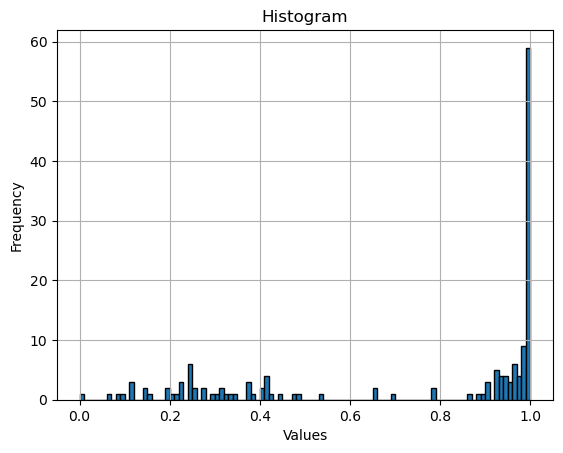

In [567]:
# Create a histogram
plt.hist(hybrid_list, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)

# Show the histogram
plt.show()

In [573]:
new_list = []
for i in hybrid_list:
    if i < 0.6:
        new_list.append('exaltata')
    elif i < 0.98:
        new_list.append('hybrid')
    else:
        new_list.append('syriaca')

In [574]:
hybriddf['hybrids'] = new_list

C:\Users\15404\AppData\Local\Temp\ipykernel_18032\3802935234.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [575]:
hybriddf[['V2', 'hybrids']]

genera        V2   hybrids
0       0.999777   syriaca
1       1.000000   syriaca
2       0.989131   syriaca
3       0.999992   syriaca
4       0.998548   syriaca
..           ...       ...
160     0.448157  exaltata
161     0.412527  exaltata
162     0.307915  exaltata
163     0.482944  exaltata
164     0.999504   syriaca

[154 rows x 2 columns]

In [576]:
hybriddf.shape

(154, 105)

In [578]:
X = hybriddf[top_100.index]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=hybriddf['hybrids'])
fig.update_layout(
    title = "Plant Microbes by Site Colored by % Syriaca THIS GRAPH IS SUBJECT TO CHANGE",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

In [ ]:

To create a histogram from a list in Python, you can use the matplotlib library, which provides a convenient way to visualize data, including histograms. Here's how you can create a histogram from a list:

python
Copy code
import matplotlib.pyplot as plt

# Sample data (replace this with your own list)
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5]

# Create a histogram
plt.hist(data, bins=10, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)

# Show the histogram
plt.show()

### TSNE Using Top 100 Genera for Syriaca & Exaltata

In [463]:
X = pivoted_df[top_100.index]

perplexity_value = 4 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=pivoted_df['species'])
fig.update_layout(title = 'Plant Microbes by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

In [464]:
X = pivoted_df[top_100.index]

perplexity_value = 3 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=pivoted_df['V2'])
fig.update_layout(title = 'Plant Microbes by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

In [607]:
def get_X_top_microbes(df_1, x_Num):
    df_1.astype(float)
    sum_row = df_1.sum()
    top_X = sum_row.nlargest(x_Num)
    select_columns = (top_X.index).tolist()
    select_columns.insert(0, 'V2')
    select_columns.insert(0, 'sample_id')
    select_columns.insert(0, 'site_id')
    select_columns.insert(0, 'species')
    return select_columns

### Create PCA With Top 500 Most Abundant Genera

In [479]:
cols = get_X_top_microbes(origin_pivoted_df[genera_col], 500)

In [480]:
newdf = origin_pivoted_df[cols]

In [482]:
genera_cols = newdf.columns.drop(['sample_id', 'site_id', 'species', 'V2'])

In [483]:
newdf[genera_cols]

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                0.251082                        
1                                                0.229215                        
2                                                0.248940                        
3                                                0.207900                        
4                                                0.115334                        
..                                                    ...                        
160                                              0.111228                        
161                                              0.158455                        
162                                              0.190285                        
163                                              0.152850                        
164                                              0.126501                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.109277                              
1                                                0.108392                              
2                                                0.130199                              
3                                                0.115806                              
4                                                0.067272                              
..                                                    ...                              
160                                              0.098192                              
161                                              0.099516                              
162                                              0.108226                              
163                                              0.120529                              
164                                              0.113681                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                                0.040132                       
1                                                0.047850                       
2                                                0.066974                       
3                                                0.037190                       
4                                                0.002857                       
..                                                    ...                       
160                                              0.042100                       
161                                              0.047186                       
162                                              0.049673                       
163                                              0.069768                       
164                                              0.063480                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.037915                              
1                                                0.043322                              
2                                                0.037310                              
3                                                0.045575                              
4                                                0.033787                              
..                                                    ...                              
160                                              0.024829                              
161                                              0.026758                              
162                                              0.031467                              
163                                              0.041159                              
164              

In [484]:
newdf[genera_cols] = StandardScaler().fit_transform(newdf[genera_cols])  

C:\Users\15404\AppData\Local\Temp\ipykernel_18032\2673082118.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [485]:
newdf[genera_cols]

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus  \
0                                                1.658585                        
1                                                1.177418                        
2                                                1.611450                        
3                                                0.708383                        
4                                               -1.328517                        
..                                                    ...                        
160                                             -1.418869                        
161                                             -0.379646                        
162                                              0.320774                        
163                                             -0.502977                        
164                                             -1.082782                        

genera  Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus  \
0                                                0.449190                              
1                                                0.398179                              
2                                                1.654841                              
3                                                0.825395                              
4                                               -1.971450                              
..                                                    ...                              
160                                             -0.189635                              
161                                             -0.113333                              
162                                              0.388606                              
163                                              1.097577                              
164                                              0.702963                              

genera  Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus  \
0                                               -0.625305                       
1                                               -0.265843                       
2                                                0.624824                       
3                                               -0.762340                       
4                                               -2.361323                       
..                                                    ...                       
160                                             -0.533663                       
161                                             -0.296765                       
162                                             -0.180938                       
163                                              0.754959                       
164                                              0.462102                       

genera  Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita  \
0                                                0.059558                              
1                                                0.624099                              
2                                               -0.003629                              
3                                                0.859331                              
4                                               -0.371434                              
..                                                    ...                              
160                                             -1.306735                              
161                                             -1.105328                              
162                                             -0.613701                              
163                                              0.398210                              
164              

### PCA By Site with Top 500 Most Relatively Abundant Genera

In [486]:
X = newdf[genera_cols]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=newdf['site_id'])
fig.update_layout(
    title = "Top 500 Plant Microbes by Site",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### PCA By Species with Top 500 Most Relatively Abundant Genera

In [487]:
X = newdf[genera_cols]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=newdf['species'])
fig.update_layout(
    title = "Top 500 Plant Microbes by Species",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### PCA By Species with only Syriaca & Exaltata

In [488]:
newdf = newdf[newdf["species"].isin(['syriaca', 'exaltata'])]
newdf.shape

(154, 504)

In [489]:
X = newdf[genera_cols]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=newdf['species'])
fig.update_layout(
    title = "Top 500 Plant Microbes by Species including Syriaca and Exaltata",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### PCA by Species with only Syriaca & Exaltata Colored

In [490]:
X = newdf[genera_cols]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=newdf['V2'])
fig.update_layout(
    title = "Top 500 Plant Microbes by Species including Syriaca and Exaltata",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### Create PCA and TSNE with Top 50 Genera

In [751]:
def get_X_top_microbes(df_1, x_Num):
    df_1.astype(float)
    sum_row = df_1.sum()
    top_X = sum_row.nlargest(x_Num)
    select_columns = (top_X.index).tolist()
    select_columns.insert(0, 'V2')
    select_columns.insert(0, 'sample_id')
    select_columns.insert(0, 'site_id')
    select_columns.insert(0, 'species')
    return select_columns

In [752]:
df50 = origin_pivoted_df
df50.head()

genera sample_id site_id  species        V2  \
0          CMB10     CMB  syriaca  0.999777   
1          CMB11     CMB  syriaca  1.000000   
2          CMB13     CMB  syriaca  0.989131   
3          CMB14     CMB  syriaca  0.999992   
4          CMB15     CMB  syriaca  0.998548   

genera  Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum  \
0                                               -0.557532                              
1                                               -0.557532                              
2                                               -0.557532                              
3                                               -0.557532                              
4                                                2.094554                              

genera  Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halococcaceae|Halococcus  \
0                                               -0.869328                             
1                                               -1.027142                             
2                                               -0.257144                             
3                                                0.516708                             
4                                               -0.557472                             

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Natrinema  \
0                                               -0.078087                         
1                                               -0.078087                         
2                                               -0.078087                         
3                                               -0.078087                         
4                                               -0.078087                         

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Natronococcus  \
0                                                     0.0                             
1                                                     0.0                             
2                                                     0.0                             
3                                                     0.0                             
4                                                     0.0                             

genera  Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Saliphagus  \
0                                               -0.117389                          
1                                               -0.123803                          
2                                                0.695970                          
3                                                0.363315                          
4                                               -1.014045                          

genera  Archaea|Euryarchaeota|Methanobacteria|Methanobacteriales|Methanobacteriaceae|Methanobacterium  \
0                                               -0.189346                                               
1                                               -0.189346                                               
2                                               -0.189346                                               
3                                               -0.189346                                               
4                                               -0.189346                                               

genera  ...  Viruses|||Caudovirales|Siphoviridae|Np1virus  \
0       ...                                     -0.078087   
1       ...                                     -0.078087   
2       ...                                     -0.078087   
3       ...                                     -0.078087   
4       ...                                     -0.078087   

genera  Viruses|||Caudovirales|Siphoviridae|Pa6virus  \
0                                          -0.078087   
1                           

In [753]:
all_genera = df50.columns.drop(['sample_id','site_id','species','V2'])

In [754]:
cols = get_X_top_microbes(df50[all_genera], 500)

In [755]:
df50 = df50[cols]

In [756]:
df50.shape

(165, 504)

In [757]:
genera_columns = df50.columns.drop(['sample_id','site_id','species','V2'])

In [758]:
df50[genera_columns] = StandardScaler().fit_transform(df50[genera_columns])  

C:\Users\15404\AppData\Local\Temp\ipykernel_18032\2302579837.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [759]:
X1 = df50[genera_columns]
pca = PCA(n_components=2)
components = pca.fit_transform(X1)

fig = px.scatter(components, x=0, y=1, color=df50['site_id'])
fig.update_layout(
    title = "Top 50 Plant Microbes by Site",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()